In [1]:
import theano
import theano.tensor as T
import numpy as np
import pandas as pd
import cPickle as pkl
from matplotlib import pyplot as plt
import time
import linearcorex

# Load and process data

In [2]:
with open('../data/EOD_day.pkl', 'rb') as f:
    day_df = pd.DataFrame(pkl.load(f))

print("Data.shape = {}".format(day_df.shape))

df_2010 = day_df[day_df.index >= '2010-01-01']
df_2010 = df_2010[df_2010.index <= '2012-01-01']  # NOTE: 2 years

X = []
for i in range(1, 2*365//14 - 2):
    week_start = 10 * i
    week_end = 10 * (i + 1)
    X.append(df_2010[week_start : week_end])  # two weeks
print [len(x) for x in X]

Data.shape = (4277, 5038)
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


# Train

In [3]:
single_corex = []
for t in range(len(X)):
    print("training corex {} / {}".format(t+1, len(X)))
    C = linearcorex.Corex(n_hidden=10,
                          max_iter=150,
                          verbose=True)
    C.fit(X[t])
    single_corex.append(C)

training corex 1 / 49
Linear CorEx with 10 latent factors
101 iterations to tol: 0.000010
81 iterations to tol: 0.000010
24 iterations to tol: 0.000010
training corex 2 / 49
Linear CorEx with 10 latent factors
31 iterations to tol: 0.000010
training corex 3 / 49
Linear CorEx with 10 latent factors
147 iterations to tol: 0.000010
42 iterations to tol: 0.000010
26 iterations to tol: 0.000010
training corex 4 / 49
Linear CorEx with 10 latent factors
training corex 5 / 49
Linear CorEx with 10 latent factors
training corex 6 / 49
Linear CorEx with 10 latent factors
69 iterations to tol: 0.000010
training corex 7 / 49
Linear CorEx with 10 latent factors
62 iterations to tol: 0.000010
training corex 8 / 49
Linear CorEx with 10 latent factors
training corex 9 / 49
Linear CorEx with 10 latent factors
training corex 10 / 49
Linear CorEx with 10 latent factors
training corex 11 / 49
Linear CorEx with 10 latent factors
training corex 12 / 49
Linear CorEx with 10 latent factors
144 iterations to to

training corex 17 / 49
Linear CorEx with 10 latent factors
training corex 18 / 49
Linear CorEx with 10 latent factors
23 iterations to tol: 0.000010
training corex 19 / 49
Linear CorEx with 10 latent factors
144 iterations to tol: 0.000010
76 iterations to tol: 0.000010
26 iterations to tol: 0.000010
training corex 20 / 49
Linear CorEx with 10 latent factors
86 iterations to tol: 0.000010
39 iterations to tol: 0.000010
26 iterations to tol: 0.000010
19 iterations to tol: 0.000010
training corex 21 / 49
Linear CorEx with 10 latent factors
146 iterations to tol: 0.000010
training corex 22 / 49
Linear CorEx with 10 latent factors
30 iterations to tol: 0.000010
training corex 23 / 49
Linear CorEx with 10 latent factors
39 iterations to tol: 0.000010
40 iterations to tol: 0.000010
training corex 24 / 49
Linear CorEx with 10 latent factors
133 iterations to tol: 0.000010
28 iterations to tol: 0.000010
32 iterations to tol: 0.000010
training corex 25 / 49
Linear CorEx with 10 latent factors
t

43 iterations to tol: 0.000010
training corex 33 / 49
Linear CorEx with 10 latent factors
146 iterations to tol: 0.000010
24 iterations to tol: 0.000010
43 iterations to tol: 0.000010
30 iterations to tol: 0.000010
40 iterations to tol: 0.000010
training corex 34 / 49
Linear CorEx with 10 latent factors
118 iterations to tol: 0.000010
98 iterations to tol: 0.000010
49 iterations to tol: 0.000010
training corex 35 / 49
Linear CorEx with 10 latent factors
training corex 36 / 49
Linear CorEx with 10 latent factors
129 iterations to tol: 0.000010
62 iterations to tol: 0.000010
10 iterations to tol: 0.000010
training corex 37 / 49
Linear CorEx with 10 latent factors
training corex 38 / 49
Linear CorEx with 10 latent factors
training corex 39 / 49
Linear CorEx with 10 latent factors
83 iterations to tol: 0.000010
training corex 40 / 49
Linear CorEx with 10 latent factors
training corex 41 / 49
Linear CorEx with 10 latent factors
training corex 42 / 49
Linear CorEx with 10 latent factors
trai

67 iterations to tol: 0.000010
10 iterations to tol: 0.000010
training corex 48 / 49
Linear CorEx with 10 latent factors
training corex 49 / 49
Linear CorEx with 10 latent factors


In [4]:
print np.sum([c.tc for c in single_corex])

252547.442158


# Print statistics

In [5]:
single_covs = [c.get_covariance() for c in single_corex]
covs_diff = [np.square(single_covs[t+1] - single_covs[t]).sum() for t in range(len(X) - 1)]

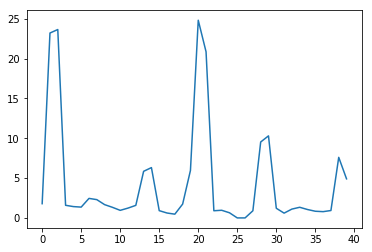

In [6]:
covs_diff[25] = 0
covs_diff[26] = 0
plt.plot(covs_diff[:40])
plt.show()

## apple MI with hidden factors over the time

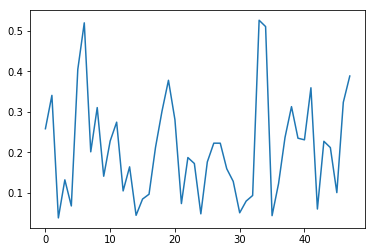

In [7]:
apple = 7
mis = []
for t in range(len(X)):
    mis.append(single_corex[t].mis[:, apple])
    
mis_diff = [np.square(mis[t+1] - mis[t]).sum() for t in range(len(X)-1)]

plt.plot(mis_diff)
plt.show()

In [8]:
for i in range(len(mis_diff)):
    if mis_diff[i] > 0.4:
        print X[i].index[3], " - ", X[i+1].index[3]

2010-04-06 00:00:00  -  2010-04-20 00:00:00
2010-04-20 00:00:00  -  2010-05-04 00:00:00
2011-05-13 00:00:00  -  2011-05-27 00:00:00
2011-05-27 00:00:00  -  2011-06-13 00:00:00
